# **LOGISTIC REGRESSION MODEL**

## **1. LOAD THE DATA AND OBTAIN THE MOST FREQUENT WORDS IN POSITIVE AND NEGATIVE FAKE NEWS ARTICLES**

**IMPORT CLEAN DATASET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/thesiss/Spanish_merged_dataa.csv')

In [ ]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
data

,Category,Text,clean_with_stopwords,final_clean
0,1,"RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...",rae incluir el palabra lady en el diccionario ...,rae incluir palabra lady diccionario idioma es...
1,1,"La palabra ""haiga"", aceptada por la RAE La Rea...",el palabra haigar aceptado por el rae el real ...,palabra haigar aceptado rae real academia leng...
2,1,YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...,yordi rosado escribir y diseñar el nuevo libro...,yordi rosado escribir diseñar nuevo libro text...
3,0,UNAM capacitará a maestros para aprobar prueba...,unam capacitar a maestro para aprobar prueba p...,unam capacitar maestro aprobar prueba pis maxi...
4,1,Alerta: pretenden aprobar libros escolares con...,alerta pretender aprobar libro escolar con con...,alerta pretender aprobar libro escolar conteni...
...,...,...,...,...
2966,0,El Consejo de Gobierno ha dado su visto bueno...,el consejo de gobierno haber dar su visto buen...,consejo gobierno haber dar visto bueno convoca...
2967,0,Investigadores valencianos han desarrollado u...,investigador valenciano haber desarrollar uno ...,investigador valenciano haber desarrollar inno...
2968,0,Los arrestados actuaban en coches y en establ...,el arrestado actuar en coche y en establecimie...,arrestado actuar coche establecimiento policia...
2969,0,El Rey ha encargado este miércoles a Pedro Sá...,el rey haber encargar este miercoles a pedro s...,rey haber encargar miercoles pedro sanchez pre...


**COUNT THE Nº OF OCCURRENCES OF EACH TOKEN IN FAKE AND REAL PIECES NEWS**

In [ ]:
L = list(zip(data['Category'], data['final_clean'])) # Create a list of tuples ('label','text')

In [ ]:
print(len(L))

2971


In [ ]:
import nltk
nltk.download('punkt')  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import collections
from collections import Counter
import nltk

true = []
fake = []
for k,v in L:
  if k == 1:
    fake.append(nltk.tokenize.word_tokenize(v))
  else: 
    true.append(nltk.tokenize.word_tokenize(v))

print(len(true))  
print(len(fake))


1491
1480


In [ ]:
trueList = [ item for elem in true for item in elem]
fakeList = [ item for elem in fake for item in elem]

In [ ]:
len(trueList)

147025

In [ ]:
len(fakeList)

100083

In [ ]:
def true_unigrams(trueList):
    uni_t = list(zip(trueList))
    print(collections.Counter(uni_t))

true_unigrams(trueList)

Counter({('ser',): 4078, ('haber',): 2809, ('mas',): 1317, ('tener',): 1098, ('poder',): 928, ('año',): 889, ('hacer',): 777, ('mexico',): 694, ('decir',): 689, ('primero',): 450, ('pais',): 436, ('tambien',): 426, ('ir',): 419, ('gobierno',): 405, ('dar',): 384, ('nuevo',): 375, ('mexicano',): 370, ('dos',): 370, ('millon',): 347, ('presidente',): 347, ('segun',): 340, ('dia',): 339, ('persona',): 330, ('solo',): 316, ('parte',): 307, ('partido',): 304, ('caso',): 299, ('lopez',): 291, ('publico',): 285, ('nacional',): 282, ('mujer',): 279, ('ver',): 277, ('mil',): 271, ('ultimo',): 269, ('pasado',): 268, ('alguno',): 262, ('asi',): 261, ('social',): 259, ('ciudad',): 254, ('despues',): 253, ('vez',): 250, ('obrador',): 250, ('candidato',): 247, ('tres',): 245, ('mismo',): 236, ('tras',): 234, ('deber',): 234, ('medio',): 229, ('llegar',): 222, ('asegurar',): 219, ('mes',): 216, ('ademas',): 213, ('querer',): 212, ('mayor',): 210, ('politico',): 208, ('ahora',): 206, ('acuerdo',): 204

In [ ]:
def fake_unigrams(fakeList):
    uni_f = list(zip(fakeList))
    print(collections.Counter(uni_f))

fake_unigrams(fakeList)

Counter({('ser',): 3598, ('haber',): 1923, ('tener',): 919, ('poder',): 904, ('mas',): 851, ('hacer',): 719, ('decir',): 509, ('dar',): 486, ('mexico',): 465, ('año',): 433, ('ir',): 402, ('solo',): 353, ('asi',): 319, ('pais',): 309, ('dia',): 299, ('primero',): 298, ('ver',): 297, ('nuevo',): 292, ('mexicano',): 288, ('querer',): 265, ('gobierno',): 256, ('persona',): 246, ('saber',): 226, ('presidente',): 225, ('tambien',): 225, ('vez',): 224, ('ahora',): 221, ('mujer',): 220, ('mismo',): 218, ('señalar',): 211, ('deber',): 201, ('segun',): 200, ('llegar',): 199, ('dejar',): 197, ('poner',): 197, ('alguno',): 195, ('ademas',): 193, ('medio',): 192, ('partido',): 192, ('parte',): 168, ('llevar',): 168, ('dos',): 167, ('mes',): 165, ('tras',): 164, ('mundo',): 163, ('gente',): 162, ('pasar',): 160, ('pues',): 160, ('mejor',): 159, ('español',): 156, ('españa',): 154, ('seguir',): 154, ('decidir',): 151, ('ganar',): 150, ('hora',): 147, ('ciudad',): 146, ('nombre',): 146, ('encontrar',

**MOST FREQUENT WORDS IN FAKE AND REAL NEWS**

In [ ]:
from wordcloud import WordCloud

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

*REAL NEWS*

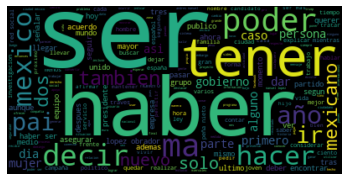

In [ ]:
import matplotlib.pyplot as plt

listToStr = ' '.join(map(str, trueList))
wordcloud = WordCloud().generate(listToStr)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

*FAKE NEWS*

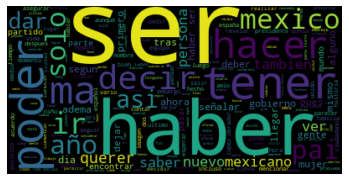

In [ ]:
import matplotlib.pyplot as plt

listToStr_f = ' '.join(map(str, fakeList))
wordcloud_f = WordCloud().generate(listToStr_f)

plt.imshow(wordcloud_f, interpolation='bilinear')
plt.axis("off")
plt.show()

## **2. LINGUISTIC FEATURES**

#*2.1 Highly emotional words*

*LOAD THE SPANISH EMOTION LEXICON (SEL) DATASET*

In [ ]:
sentiment_words=pd.read_csv('sentiment.csv', encoding = "ISO-8859-1")  #LOAD SPANISH EMOTION LEXICON DATASET

In [ ]:
sentiment_words  

,#,Palabra,Nula[%],Baja[%],Media[%],Alta[%],PFA,Categoría
0,1,abundancia,0,0,50,50,0.830,Alegría
1,2,acabalar,40,0,60,0,0.396,Alegría
2,3,acallar,50,40,10,0,0.198,Alegría
3,4,acatar,50,40,10,0,0.198,Alegría
4,5,acción,30,30,30,10,0.397,Alegría
...,...,...,...,...,...,...,...,...
2031,2039,trizas,30,20,30,20,0.464,Tristeza
2032,2040,vejación,30,50,20,0,0.297,Tristeza
2033,2041,vejar,20,40,40,0,0.396,Tristeza
2034,2042,vergonzoso,40,50,10,0,0.231,Tristeza


In [ ]:
reduced_sentiment=sentiment_words[sentiment_words[' PFA']>0] 
reduced_sentiment

,#,Palabra,Nula[%],Baja[%],Media[%],Alta[%],PFA,Categoría
0,1,abundancia,0,0,50,50,0.830,Alegría
1,2,acabalar,40,0,60,0,0.396,Alegría
2,3,acallar,50,40,10,0,0.198,Alegría
3,4,acatar,50,40,10,0,0.198,Alegría
4,5,acción,30,30,30,10,0.397,Alegría
...,...,...,...,...,...,...,...,...
2031,2039,trizas,30,20,30,20,0.464,Tristeza
2032,2040,vejación,30,50,20,0,0.297,Tristeza
2033,2041,vejar,20,40,40,0,0.396,Tristeza
2034,2042,vergonzoso,40,50,10,0,0.231,Tristeza


*LABEL WORDS INTO THE CATEGORY 'NEGATIVE' OR 'POSITIVE'*

In [ ]:
def calculate_sentiment(row): # LABEL NEGATIVE CATEGORIES AS 'negative' AND POSITIVE CATEGORIES AS 'positive'
    if row['Categoría'] == 'Enojo' or row['Categoría'] == 'Miedo' or row['Categoría'] == 'Repulsión'  or row['Categoría'] == 'Tristeza':
        return 'negative'  #'ANGRY', 'FEAR', 'REPULSIVENESS','SADNESS' = 'negative'
    else:
        return 'positive' # 'SURPRISE' and 'HAPPINESS' = 'positive'
    
reduced_sentiment['sentiment']=reduced_sentiment.apply(calculate_sentiment,axis=1) # you can have it: reduced_sentiment['sentiment] = reduced_sentiment['sentiment].apply(calculate_sentiment)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
import re 

def clean_data(text):
    
    text = re.sub(r'<br />', ' ', text) #Removes Html tag
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ',text)
    text = text.replace('number', ' ')
    text = text.replace('email', ' ')
    text = text.replace('urls', ' ')
    text = text.replace('phone', ' ')
    text = text.replace('*dol*', ' ')
    text = text.replace('*eur*', ' ')
    text = re.sub(r'[^\ a-zá-úA-Z]+', '', text)  #Removes non-alphabetic characters
    text = re.sub(r'^\s*|\s\s*', ' ', text).strip() #Removes extra whitespace, tabs
    text = re.sub(r'á', 'a', text)  #Converts accented vowels to their non-accented form
    text = re.sub(r'é', 'e', text)
    text = re.sub(r'í', 'i', text)
    text = re.sub(r'ó', 'o', text)
    text = re.sub(r'ú','u', text)

    return text

*CLEANING THE DATA IN THE SEL DATASET*

In [ ]:
reduced_sentiment['Palabra'] = reduced_sentiment['Palabra'].apply(lambda x: clean_data(x))  #apply clean_data function to remove accents, etc. in the SEL (Spanish Emotional Lexicon) dictionary

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
reduced_sentiment.head()

,#,Palabra,Nula[%],Baja[%],Media[%],Alta[%],PFA,Categoría,sentiment
0,1,abundancia,0,0,50,50,0.830,Alegría,positive
1,2,acabalar,40,0,60,0,0.396,Alegría,positive
2,3,acallar,50,40,10,0,0.198,Alegría,positive
3,4,acatar,50,40,10,0,0.198,Alegría,positive
4,5,accion,30,30,30,10,0.397,Alegría,positive


**2.1.1 POSITIVE AND NEGATIVE WORDS**

*CONVERT DATA TO LIST FORMAT*

In [ ]:
positive_words=reduced_sentiment[reduced_sentiment['sentiment']=='positive']['Palabra'].to_list()
negative_words=reduced_sentiment[reduced_sentiment['sentiment']=='negative']['Palabra'].to_list()

In [ ]:
def calculate_count(row):
    neg_counter=0
    pos_counter=0
    for word in row['final_clean'].split():
        if word in negative_words:
            neg_counter+=1  
        elif word in positive_words:
            pos_counter+=1  

    return pd.Series([neg_counter,pos_counter],index=['neg','pos'])
            
data1=pd.concat((data,data.apply(calculate_count,axis=1)),axis=1)

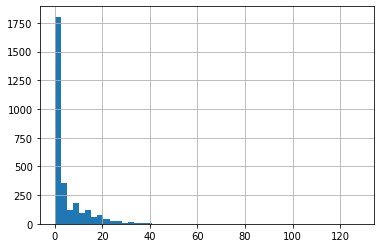

In [ ]:
data1['total']=data1['neg']+data1['pos']
data1['total'].hist(bins=50)

In [ ]:
data1['total'].value_counts()

0      658
1      654
2      492
3      201
4      100
9       66
7       65
8       62
6       58
12      53
5       52
10      51
14      46
11      43
13      42
17      32
18      32
15      31
16      31
19      24
20      24
22      22
24      15
21      13
23      11
28       9
31       8
25       8
26       8
27       7
30       6
29       5
40       4
37       4
35       4
33       3
60       2
70       2
32       2
36       2
34       1
85       1
42       1
94       1
63       1
55       1
43       1
39       1
128      1
98       1
88       1
44       1
65       1
66       1
62       1
54       1
52       1
50       1
72       1
Name: total, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f463ec42c50>,
      dtype=object)

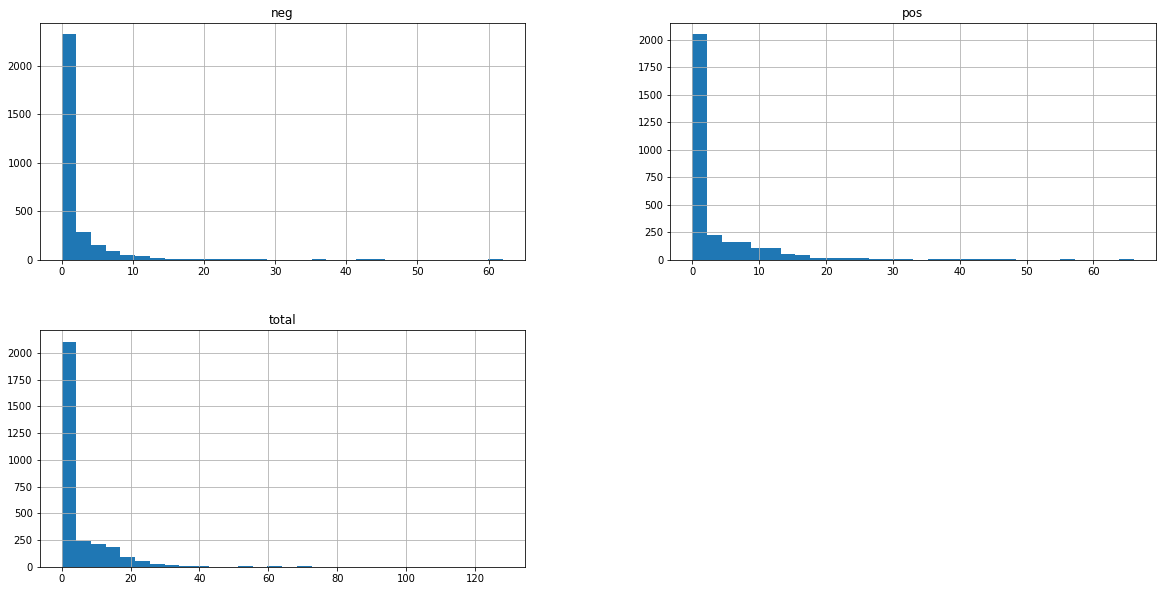

In [ ]:
data1[['neg','pos','total']].hist(bins=30,figsize=(20,10))

In [ ]:
data= data1

*TOTAL NUMBER OF WORDS IN THE WHOLE CORPUS*

In [ ]:
complete_corpus=" ".join(list(data['final_clean'].values))

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
total_words=len(nltk.word_tokenize(complete_corpus))
total_words

247108

*TOTAL NUMBER OF WORDS PER ARTICLE*

In [ ]:
data['final_clean'].str.len()

0       1836
1        735
2       1720
3        767
4       3685
        ... 
2966     162
2967     187
2968     159
2969     195
2970     200
Name: final_clean, Length: 2971, dtype: int64

In [ ]:
data['final_clean'].str.len().max()  

10482

In [ ]:
data['final_clean'].str.len().mean() 

632.1383372601817

In [ ]:
data.groupby(by='Category').mean()

,neg,pos,total
Category,,,
0,1.989269,3.714286,5.703555
1,1.756757,3.030405,4.787162


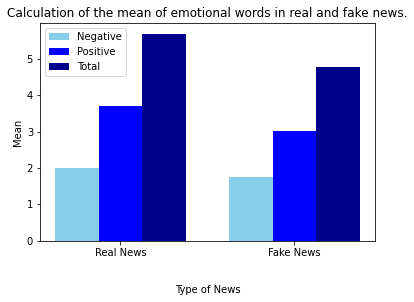

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 2
ind = np.arange(N) 
width = 0.25
  
xvals = [1.989269, 1.756757]
bar1 = plt.bar(ind, xvals, width, color = 'skyblue')
  
yvals = [3.714286, 3.030405]
bar2 = plt.bar(ind+width, yvals, width, color= 'blue')
  
zvals = [5.703555, 4.787162]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'darkblue')
  
plt.xlabel('\n\nType of News')
plt.ylabel('Mean')
plt.title("Calculation of the mean of emotional words in real and fake news.")
plt.xticks(ind+width,['Real News', 'Fake News'])
plt.legend( (bar1, bar2, bar3), ('Negative', 'Positive', 'Total') )
plt.show()

**2.1.3 CALCULATE NORMALIZED FREQUENCY**

In [ ]:
data

,Category,Text,clean_with_stopwords,final_clean,neg,pos,total
0,1,"RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...",rae incluir el palabra lady en el diccionario ...,rae incluir palabra lady diccionario idioma es...,6,2,8
1,1,"La palabra ""haiga"", aceptada por la RAE La Rea...",el palabra haigar aceptado por el rae el real ...,palabra haigar aceptado rae real academia leng...,1,4,5
2,1,YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...,yordi rosado escribir y diseñar el nuevo libro...,yordi rosado escribir diseñar nuevo libro text...,4,17,21
3,0,UNAM capacitará a maestros para aprobar prueba...,unam capacitar a maestro para aprobar prueba p...,unam capacitar maestro aprobar prueba pis maxi...,0,2,2
4,1,Alerta: pretenden aprobar libros escolares con...,alerta pretender aprobar libro escolar con con...,alerta pretender aprobar libro escolar conteni...,11,14,25
...,...,...,...,...,...,...,...
2966,0,El Consejo de Gobierno ha dado su visto bueno...,el consejo de gobierno haber dar su visto buen...,consejo gobierno haber dar visto bueno convoca...,0,2,2
2967,0,Investigadores valencianos han desarrollado u...,investigador valenciano haber desarrollar uno ...,investigador valenciano haber desarrollar inno...,0,0,0
2968,0,Los arrestados actuaban en coches y en establ...,el arrestado actuar en coche y en establecimie...,arrestado actuar coche establecimiento policia...,1,0,1
2969,0,El Rey ha encargado este miércoles a Pedro Sá...,el rey haber encargar este miercoles a pedro s...,rey haber encargar miercoles pedro sanchez pre...,0,0,0


In [ ]:
data['emotion']=data['total']/data['final_clean'].str.len() # Divide the amount of positive and negative words / total number of words per article

In [ ]:
data

,Category,Text,clean_with_stopwords,final_clean,neg,pos,total,emotion
0,1,"RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...",rae incluir el palabra lady en el diccionario ...,rae incluir palabra lady diccionario idioma es...,6,2,8,0.004357
1,1,"La palabra ""haiga"", aceptada por la RAE La Rea...",el palabra haigar aceptado por el rae el real ...,palabra haigar aceptado rae real academia leng...,1,4,5,0.006803
2,1,YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...,yordi rosado escribir y diseñar el nuevo libro...,yordi rosado escribir diseñar nuevo libro text...,4,17,21,0.012209
3,0,UNAM capacitará a maestros para aprobar prueba...,unam capacitar a maestro para aprobar prueba p...,unam capacitar maestro aprobar prueba pis maxi...,0,2,2,0.002608
4,1,Alerta: pretenden aprobar libros escolares con...,alerta pretender aprobar libro escolar con con...,alerta pretender aprobar libro escolar conteni...,11,14,25,0.006784
...,...,...,...,...,...,...,...,...
2966,0,El Consejo de Gobierno ha dado su visto bueno...,el consejo de gobierno haber dar su visto buen...,consejo gobierno haber dar visto bueno convoca...,0,2,2,0.012346
2967,0,Investigadores valencianos han desarrollado u...,investigador valenciano haber desarrollar uno ...,investigador valenciano haber desarrollar inno...,0,0,0,0.000000
2968,0,Los arrestados actuaban en coches y en establ...,el arrestado actuar en coche y en establecimie...,arrestado actuar coche establecimiento policia...,1,0,1,0.006289
2969,0,El Rey ha encargado este miércoles a Pedro Sá...,el rey haber encargar este miercoles a pedro s...,rey haber encargar miercoles pedro sanchez pre...,0,0,0,0.000000


#*2.2 Slang and profanity words*

**LOAD A DATASET OF SLANG AND PROFANITY WORDS COMPILED MANUALLY FROM DIFFERENT WEBSITES**

In [ ]:
slang_words=pd.read_csv('slang.csv',header=None,encoding = "ISO-8859-1")[0]

*LEMMATIZATION*

In [ ]:
!pip install -U pip setuptools wheel

     |████████████████████████████████| 1.7 MB 5.0 MB/s 
     |████████████████████████████████| 952 kB 28.0 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install -U spacy

     |████████████████████████████████| 6.0 MB 4.9 MB/s            
     |████████████████████████████████| 42 kB 1.3 MB/s             
     |████████████████████████████████| 628 kB 44.2 MB/s            
     |████████████████████████████████| 451 kB 45.1 MB/s            
     |████████████████████████████████| 181 kB 67.8 MB/s            
     |████████████████████████████████| 10.1 MB 12.5 MB/s            
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uni

In [ ]:
!python -m spacy download es_core_news_sm

     |████████████████████████████████| 14.0 MB 256 kB/s            
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
import spacy
from spacy import displacy

In [ ]:
nlp = spacy.load('es_core_news_sm') 

In [ ]:
slang_words = slang_words.apply(lambda x: " ".join([y.lemma_ for y in nlp(x)])).to_list() 

In [ ]:
## Example for slang
'zoquete' in slang_words

True

*CALCULATE NORMALIZED FREQUENCY:* **SLANG WORDS PER ARTICLE /TOTAL NUMBER OF TOKENS PER ARTICLE** 

In [ ]:
slang_words=list(slang_words)

In [ ]:
def slang_prob(text):
    slang_counter=0
    for word in text.lower().split():
        if word in slang_words:
            slang_counter+=1
    if slang_counter > 1:
        return slang_counter/len(text.lower().split())
    else:
        return 0

In [ ]:
data['slang_prob'] = data['final_clean'].apply(lambda x: slang_prob(x))
data.head()

,Category,Text,clean_with_stopwords,final_clean,neg,pos,total,emotion,slang_prob
0,1,"RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...",rae incluir el palabra lady en el diccionario ...,rae incluir palabra lady diccionario idioma es...,6,2,8,0.004357,0.012448
1,1,"La palabra ""haiga"", aceptada por la RAE La Rea...",el palabra haigar aceptado por el rae el real ...,palabra haigar aceptado rae real academia leng...,1,4,5,0.006803,0.000000
2,1,YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...,yordi rosado escribir y diseñar el nuevo libro...,yordi rosado escribir diseñar nuevo libro text...,4,17,21,0.012209,0.013100
3,0,UNAM capacitará a maestros para aprobar prueba...,unam capacitar a maestro para aprobar prueba p...,unam capacitar maestro aprobar prueba pis maxi...,0,2,2,0.002608,0.000000
4,1,Alerta: pretenden aprobar libros escolares con...,alerta pretender aprobar libro escolar con con...,alerta pretender aprobar libro escolar conteni...,11,14,25,0.006784,0.006881


In [ ]:
data['slang_prob'].describe()

count    2971.000000
mean        0.003316
std         0.013036
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.192308
Name: slang_prob, dtype: float64

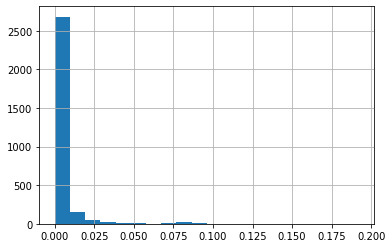

In [ ]:
data['slang_prob'].hist(bins=20)

#*2.3 Calculate number of extra linguistic-based features*

**CHARACTER AND WORD COUNT, TITLE AND UPPERCASE WORD COUNT, PUNCTUATION AND WORD DENSITY**

In [ ]:
import pandas, xgboost, numpy, textblob, string

data['char_count'] = data['final_clean'].apply(len)
data['word_count'] = data['final_clean'].apply(lambda x: len(x.split()))
data['title_word_count'] = data['Text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
data['upper_case_word_count'] = data['Text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))
data['punctuation_count'] = data['Text'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
data['word_density'] = data['char_count'] / (data['word_count']+1)

In [ ]:
data.head()

,Category,Text,clean_with_stopwords,final_clean,neg,pos,total,emotion,slang_prob,char_count,word_count,title_word_count,upper_case_word_count,punctuation_count,word_density
0,1,"RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...",rae incluir el palabra lady en el diccionario ...,rae incluir palabra lady diccionario idioma es...,6,2,8,0.004357,0.012448,1836,241,37,22,81,7.586777
1,1,"La palabra ""haiga"", aceptada por la RAE La Rea...",el palabra haigar aceptado por el rae el real ...,palabra haigar aceptado rae real academia leng...,1,4,5,0.006803,0.000000,735,100,14,5,38,7.277228
2,1,YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...,yordi rosado escribir y diseñar el nuevo libro...,yordi rosado escribir diseñar nuevo libro text...,4,17,21,0.012209,0.013100,1720,229,26,18,55,7.478261
3,0,UNAM capacitará a maestros para aprobar prueba...,unam capacitar a maestro para aprobar prueba p...,unam capacitar maestro aprobar prueba pis maxi...,0,2,2,0.002608,0.000000,767,90,25,5,13,8.428571
4,1,Alerta: pretenden aprobar libros escolares con...,alerta pretender aprobar libro escolar con con...,alerta pretender aprobar libro escolar conteni...,11,14,25,0.006784,0.006881,3685,436,91,41,117,8.432494


In [ ]:
data['word_density'].describe()

count    2971.000000
mean        7.300979
std         0.614111
min         4.888889
25%         6.958333
50%         7.342593
75%         7.681994
max        13.000000
Name: word_density, dtype: float64

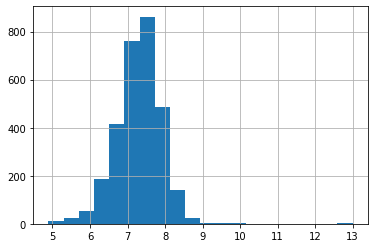

In [ ]:
data['word_density'].hist(bins=20)

In [ ]:
data['word_count'].describe()

count    2971.000000
mean       83.173342
std       123.358305
min         4.000000
25%        22.000000
50%        25.000000
75%       120.000000
max      1391.000000
Name: word_count, dtype: float64

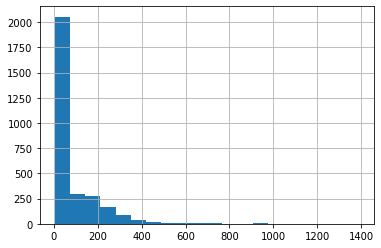

In [ ]:
data['word_count'].hist(bins=20)

**MEAN ~ DIFFERENT LINGUISTIC FEATURES**

In [ ]:
data.groupby(by='Category').mean()

,neg,pos,total,emotion,slang_prob,char_count,word_count,title_word_count,upper_case_word_count,punctuation_count,word_density
Category,,,,,,,,,,,
0,1.989269,3.714286,5.703555,0.007094,0.002305,758.64118,98.608317,23.987928,4.478203,28.665996,7.434682
1,1.756757,3.030405,4.787162,0.008874,0.004334,504.69527,67.623649,14.356757,3.643919,17.895946,7.166282


*VISUALIZATION*

In [ ]:
data

,Category,Text,clean_with_stopwords,final_clean,neg,pos,total,emotion,slang_prob,char_count,word_count,title_word_count,upper_case_word_count,punctuation_count,word_density
0,1,"RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...",rae incluir el palabra lady en el diccionario ...,rae incluir palabra lady diccionario idioma es...,6,2,8,0.004357,0.012448,1836,241,37,22,81,7.586777
1,1,"La palabra ""haiga"", aceptada por la RAE La Rea...",el palabra haigar aceptado por el rae el real ...,palabra haigar aceptado rae real academia leng...,1,4,5,0.006803,0.000000,735,100,14,5,38,7.277228
2,1,YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...,yordi rosado escribir y diseñar el nuevo libro...,yordi rosado escribir diseñar nuevo libro text...,4,17,21,0.012209,0.013100,1720,229,26,18,55,7.478261
3,0,UNAM capacitará a maestros para aprobar prueba...,unam capacitar a maestro para aprobar prueba p...,unam capacitar maestro aprobar prueba pis maxi...,0,2,2,0.002608,0.000000,767,90,25,5,13,8.428571
4,1,Alerta: pretenden aprobar libros escolares con...,alerta pretender aprobar libro escolar con con...,alerta pretender aprobar libro escolar conteni...,11,14,25,0.006784,0.006881,3685,436,91,41,117,8.432494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,0,El Consejo de Gobierno ha dado su visto bueno...,el consejo de gobierno haber dar su visto buen...,consejo gobierno haber dar visto bueno convoca...,0,2,2,0.012346,0.000000,162,22,3,0,3,7.043478
2967,0,Investigadores valencianos han desarrollado u...,investigador valenciano haber desarrollar uno ...,investigador valenciano haber desarrollar inno...,0,0,0,0.000000,0.000000,187,21,2,0,4,8.500000
2968,0,Los arrestados actuaban en coches y en establ...,el arrestado actuar en coche y en establecimie...,arrestado actuar coche establecimiento policia...,1,0,1,0.006289,0.000000,159,20,7,0,3,7.571429
2969,0,El Rey ha encargado este miércoles a Pedro Sá...,el rey haber encargar este miercoles a pedro s...,rey haber encargar miercoles pedro sanchez pre...,0,0,0,0.000000,0.000000,195,25,10,0,3,7.500000


In [ ]:
#data.to_csv('datasets.csv')

**SPLIT DATA INTO TRAIN, TEST AND VALIDATION SETS**

In [ ]:
X_train_counts_total = data[['final_clean','slang_prob','emotion']]

In [ ]:
Y_train_label = data['Category']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_counts_total, Y_train_label, test_size=0.2, stratify=Y_train_label,random_state=42)  

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train,random_state=42) 

In [ ]:
from collections import Counter
Counter(y_val)

Counter({0: 119, 1: 119})

In [ ]:
X_train

,final_clean,slang_prob,emotion
2181,primero publicacion dirigido comunidad homosex...,0.0,0.007042
677,oxford lanza propio examen certificacion nivel...,0.0,0.003785
2596,solo saber recaudar perseguir ciudadano ojo po...,0.0,0.026490
2373,quimico utilizado produccion ropa poder produc...,0.0,0.005814
2559,segun informe confidencial tribunal cuenta hab...,0.0,0.005263
...,...,...,...
2073,educacion finlandes ser publico gratuito mismo...,0.0,0.005882
294,puma unam levantar queja tras derrota tigre se...,0.0,0.012876
1622,gobierno haber anunciar presentar recurso trib...,0.0,0.000000
2314,mercado financiero reaccionar panico posibilid...,0.0,0.016667


In [ ]:
X_train.shape

(2138, 3)

In [ ]:
X_val.shape

(238, 3)

In [ ]:
X_test.shape

(595, 3)

# *3.1 COUNT VECTORIZER*

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}',max_features=5000, max_df=0.8) # unigram
count_vect.fit(data['final_clean'])

CountVectorizer(max_df=0.8, max_features=5000, token_pattern='\\w{1,}')

*3.1.1 TEXT*

In [ ]:
# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(X_train['final_clean'])
xvalid_count =  count_vect.transform(X_val['final_clean'])
xtest_count =  count_vect.transform(X_test['final_clean'])

*3.1.2 SLANG + EMOTION*

In [ ]:
# Concatenate additional 3 columns     ### 
xtrain_count_complete=np.concatenate((xtrain_count.toarray(),X_train.iloc[:,1:].values),axis=1)
xvalid_count_complete=np.concatenate((xvalid_count.toarray(),X_val.iloc[:,1:].values),axis=1)
xtest_count_complete=np.concatenate((xtest_count.toarray(),X_test.iloc[:,1:].values),axis=1)

*3.1.3 LEXICAL FEATURES*

In [ ]:
# Concatenate  all features  ### 
xtrain_count_all_features=np.concatenate((xtrain_count_complete,data.loc[X_train.index,'char_count':'word_density'].values),axis=1)
xvalid_count_all_features=np.concatenate((xvalid_count_complete,data.loc[X_val.index,'char_count':'word_density'].values),axis=1)
xtest_count_all_features=np.concatenate((xtest_count_complete,data.loc[X_test.index,'char_count':'word_density'].values),axis=1)

In [ ]:
print(count_vect.vocabulary_)

{'rae': 3950, 'incluir': 2439, 'palabra': 3429, 'lady': 2702, 'diccionario': 1476, 'idioma': 2380, 'español': 1801, 'definicion': 1337, 'mujer': 3157, 'problematico': 3803, 'españa': 1800, 'presidente': 3754, 'real': 3979, 'academia': 27, 'dario': 1296, 'villanueva': 4908, 'informar': 2479, 'conferencia': 1054, 'prensa': 3730, 'partir': 3478, 'proximo': 3878, 'mes': 3036, 'termino': 4632, 'nuevo': 3269, 'señalar': 4387, 'servir': 4372, 'definir': 1338, 'causar': 792, 'problema': 3802, 'mencionar': 3013, 'ser': 4365, 'tambien': 4578, 'utilizar': 4809, 'ingles': 2488, 'castellano': 774, 'tener': 4616, 'significado': 4407, 'diferente': 1489, 'contar': 1123, 'persona': 3565, 'haber': 2267, 'comenzar': 959, 'adoptar': 98, 'embargo': 1666, 'caso': 773, 'expresion': 1938, 'significar': 4408, 'mismo': 3097, 'original': 3389, 'dama': 1291, 'sino': 4431, 'usar': 4801, 'gente': 2169, 'poder': 3655, 'decir': 1322, 'alguno': 190, 'escandalo': 1770, 'agresivo': 132, 'tipo': 4661, 'dejar': 1341, 'con

#*3.2 TF-IDF*

In [ ]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

**WORD LEVEL**

In [ ]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', max_features=5000, max_df=0.8) #token_pattern=r'\w{1,}'
tfidf_vect.fit(data['final_clean'])
xtrain_tfidf =  tfidf_vect.transform(X_train['final_clean'])
xvalid_tfidf =  tfidf_vect.transform(X_val['final_clean'])
xtest_tfidf =  tfidf_vect.transform(X_test['final_clean'])

*SLANG + EMOTION*

In [ ]:
#  word level tf-idf --> Concatenate additional 3 columns
xtrain_tfidf_complete=np.concatenate((xtrain_tfidf.toarray(),X_train.iloc[:,1:].values),axis=1)
xvalid_tfidf_complete=np.concatenate((xvalid_tfidf.toarray(),X_val.iloc[:,1:].values),axis=1)
xtest_tfidf_complete=np.concatenate((xtest_tfidf.toarray(),X_test.iloc[:,1:].values),axis=1)

*LEXICAL FEATURES*

In [ ]:
# Concatenate  all features  ### 
xtrain_tfidf_all_features=np.concatenate((xtrain_tfidf_complete,data.loc[X_train.index,'word_count':'word_density'].values),axis=1)
xvalid_tfidf_all_features=np.concatenate((xvalid_tfidf_complete,data.loc[X_val.index,'word_count':'word_density'].values),axis=1)
xtest_tfidf_all_features=np.concatenate((xtest_tfidf_complete,data.loc[X_test.index,'word_count':'word_density'].values),axis=1)

**N-GRAM LEVEL**

*TEXT*

In [ ]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', ngram_range=(2,3), max_features=5000,max_df=0.8) #token_pattern=r'\w{1,}'
tfidf_vect_ngram.fit(data['final_clean'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train['final_clean'])
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(X_val['final_clean'])
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(X_test['final_clean'])

*SLANG + EMOTION*

In [ ]:
# ngram level tf-idf --> Concatenate additional 3 columns
xtrain_tfidf_ngram_complete=np.concatenate((xtrain_tfidf_ngram.toarray(),X_train.iloc[:,1:].values),axis=1)
xvalid_tfidf_ngram_complete=np.concatenate((xvalid_tfidf_ngram.toarray(),X_val.iloc[:,1:].values),axis=1)
xtest_tfidf_ngram_complete=np.concatenate((xtest_tfidf_ngram.toarray(),X_test.iloc[:,1:].values),axis=1)

*LEXICAL FEATURES*

In [ ]:
# Concatenate  all features  ### 
xtrain_tfidf_all_features_ngrams=np.concatenate((xtrain_tfidf_complete,data.loc[X_train.index,'word_count':'word_density'].values),axis=1)
xvalid_tfidf_all_features_ngrams=np.concatenate((xvalid_tfidf_complete,data.loc[X_val.index,'word_count':'word_density'].values),axis=1)
xtest_tfidf_all_features_ngrams=np.concatenate((xtest_tfidf_complete,data.loc[X_test.index,'word_count':'word_density'].values),axis=1)

**CHARACTER LEVEL**

*TEXT*

In [ ]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', ngram_range=(2,3), max_features=5000,max_df=0.8) #token_pattern=r'\w{1,}'
tfidf_vect_ngram_chars.fit(data['final_clean'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train['final_clean']) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_val['final_clean']) 
xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test['final_clean']) 

*SLANG + EMOTION*

In [ ]:
# characters level --> Concatenate additional 3 columns
xtrain_tfidf_ngram_chars_complete=np.concatenate((xtrain_tfidf_ngram_chars.toarray(),X_train.iloc[:,1:].values),axis=1)
xvalid_tfidf_ngram_chars_complete=np.concatenate((xvalid_tfidf_ngram_chars.toarray(),X_val.iloc[:,1:].values),axis=1)
xtest_tfidf_ngram_chars_complete=np.concatenate((xtest_tfidf_ngram_chars.toarray(),X_test.iloc[:,1:].values),axis=1)

*LEXICAL FEATURES*

In [ ]:
# Concatenate  all features  ### 
xtrain_tfidf_all_features_chars=np.concatenate((xtrain_tfidf_complete,data.loc[X_train.index,'word_count':'word_density'].values),axis=1)
xvalid_tfidf_all_features_chars=np.concatenate((xvalid_tfidf_complete,data.loc[X_val.index,'word_count':'word_density'].values),axis=1)
xtest_tfidf_all_features_chars=np.concatenate((xtest_tfidf_complete,data.loc[X_test.index,'word_count':'word_density'].values),axis=1)

## **4. TRAIN THE LR MODEL**

In [ ]:
from sklearn import model_selection, preprocessing, linear_model, metrics

In [ ]:
import itertools # construct specialized tools
import matplotlib.pyplot as plt

#*4.1 CONFUSION MATRIX*

In [ ]:
def plot_confusion_matrix(cm, classes,normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 22)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45, fontsize = 13)
    plt.yticks(tick_marks, classes, fontsize = 13)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 fontsize = 15,
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 16)
    plt.xlabel('Predicted label', fontsize = 16)

#*4.2 METRICS*

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
def train_model(classifier, feature_vector_train, label, feature_vector_valid, y_val,is_neural_net=False):
    # fit the training dataset on the classifier
    classifier_name = classifier
    classifier_name.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    acc = metrics.accuracy_score(y_val,predictions)    
    confusion = confusion_matrix(y_val,predictions)
    class_labels = classifier.classes_
        
    plt.figure()
    plot_confusion_matrix(confusion, classes = ['Fake=1','Real=0'], normalize = False,  title = 'Confusion matrix')
    plt.show()
    print('Confusion Matrix')
    print(confusion)
    
    return print(classification_report(predictions, y_val, target_names=['Fake', 'True'],digits=4),acc)

## **5. RESULTS**

#*5.1 ACCURACY ONLY USING THE TEXT FEATURE*

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


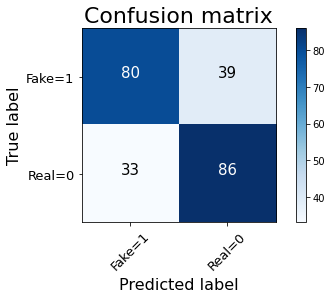

Confusion Matrix
[[80 39]
 [33 86]]
              precision    recall  f1-score   support

        Fake     0.6723    0.7080    0.6897       113
        True     0.7227    0.6880    0.7049       125

    accuracy                         0.6975       238
   macro avg     0.6975    0.6980    0.6973       238
weighted avg     0.6988    0.6975    0.6977       238
 0.6974789915966386
LR, Count Vectors:  None


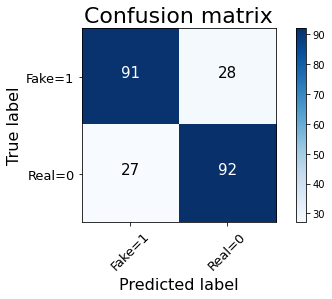

Confusion Matrix
[[91 28]
 [27 92]]
              precision    recall  f1-score   support

        Fake     0.7647    0.7712    0.7679       118
        True     0.7731    0.7667    0.7699       120

    accuracy                         0.7689       238
   macro avg     0.7689    0.7689    0.7689       238
weighted avg     0.7689    0.7689    0.7689       238
 0.7689075630252101
LR, WordLevel TF-IDF:  None


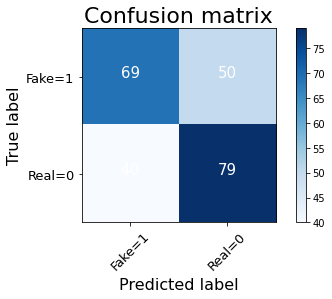

Confusion Matrix
[[69 50]
 [40 79]]
              precision    recall  f1-score   support

        Fake     0.5798    0.6330    0.6053       109
        True     0.6639    0.6124    0.6371       129

    accuracy                         0.6218       238
   macro avg     0.6218    0.6227    0.6212       238
weighted avg     0.6254    0.6218    0.6225       238
 0.6218487394957983
LR, N-Gram Vectors:  None


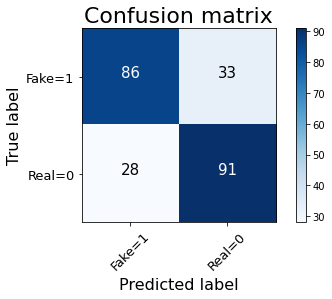

Confusion Matrix
[[86 33]
 [28 91]]
              precision    recall  f1-score   support

        Fake     0.7227    0.7544    0.7382       114
        True     0.7647    0.7339    0.7490       124

    accuracy                         0.7437       238
   macro avg     0.7437    0.7441    0.7436       238
weighted avg     0.7446    0.7437    0.7438       238
 0.7436974789915967
LR, CharLevel Vectors:  None


In [ ]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, y_train, xvalid_count,y_val)
print ("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, y_train, xvalid_tfidf,y_val)
print ("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, y_train, xvalid_tfidf_ngram,y_val)
print ("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, y_train, xvalid_tfidf_ngram_chars,y_val)
print ("LR, CharLevel Vectors: ", accuracy)

#*5.2 ACCURACY OF THE MODEL USING: SLANG + EMOTIONAL WORDS*

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


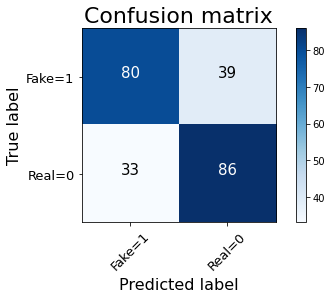

Confusion Matrix
[[80 39]
 [33 86]]
              precision    recall  f1-score   support

        Fake     0.6723    0.7080    0.6897       113
        True     0.7227    0.6880    0.7049       125

    accuracy                         0.6975       238
   macro avg     0.6975    0.6980    0.6973       238
weighted avg     0.6988    0.6975    0.6977       238
 0.6974789915966386
LR, Count Vectors:  None


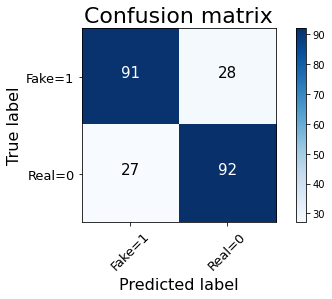

Confusion Matrix
[[91 28]
 [27 92]]
              precision    recall  f1-score   support

        Fake     0.7647    0.7712    0.7679       118
        True     0.7731    0.7667    0.7699       120

    accuracy                         0.7689       238
   macro avg     0.7689    0.7689    0.7689       238
weighted avg     0.7689    0.7689    0.7689       238
 0.7689075630252101
LR, WordLevel TF-IDF:  None


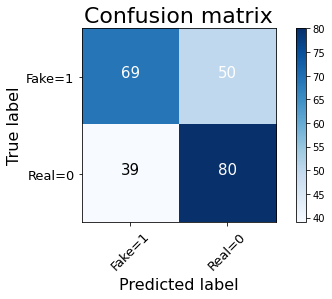

Confusion Matrix
[[69 50]
 [39 80]]
              precision    recall  f1-score   support

        Fake     0.5798    0.6389    0.6079       108
        True     0.6723    0.6154    0.6426       130

    accuracy                         0.6261       238
   macro avg     0.6261    0.6271    0.6252       238
weighted avg     0.6303    0.6261    0.6269       238
 0.6260504201680672
LR, N-Gram Vectors:  None


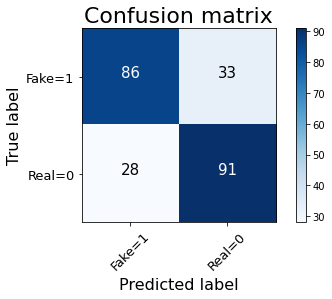

Confusion Matrix
[[86 33]
 [28 91]]
              precision    recall  f1-score   support

        Fake     0.7227    0.7544    0.7382       114
        True     0.7647    0.7339    0.7490       124

    accuracy                         0.7437       238
   macro avg     0.7437    0.7441    0.7436       238
weighted avg     0.7446    0.7437    0.7438       238
 0.7436974789915967
LR, CharLevel Vectors:  None


In [ ]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count_complete, y_train, xvalid_count_complete, y_val)
print ("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors   
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_complete, y_train, xvalid_tfidf_complete, y_val)
print ("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_complete, y_train, xvalid_tfidf_ngram_complete, y_val)
print ("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, y_train, xvalid_tfidf_ngram_chars, y_val)
print ("LR, CharLevel Vectors: ", accuracy)

# *5.3 LEXICAL FEATURES*

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


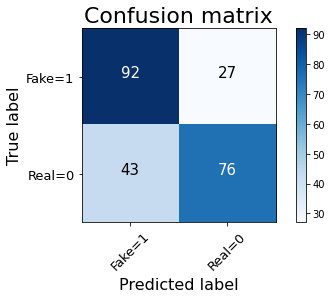

Confusion Matrix
[[92 27]
 [43 76]]
              precision    recall  f1-score   support

        Fake     0.7731    0.6815    0.7244       135
        True     0.6387    0.7379    0.6847       103

    accuracy                         0.7059       238
   macro avg     0.7059    0.7097    0.7045       238
weighted avg     0.7149    0.7059    0.7072       238
 0.7058823529411765
LR, Count Vectors:  None


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


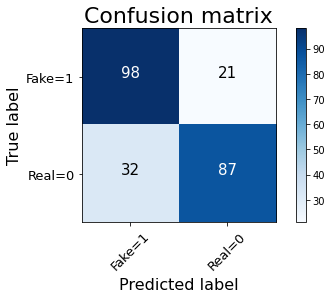

Confusion Matrix
[[98 21]
 [32 87]]
              precision    recall  f1-score   support

        Fake     0.8235    0.7538    0.7871       130
        True     0.7311    0.8056    0.7665       108

    accuracy                         0.7773       238
   macro avg     0.7773    0.7797    0.7768       238
weighted avg     0.7816    0.7773    0.7778       238
 0.7773109243697479
LR, WordLevel TF-IDF:  None


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


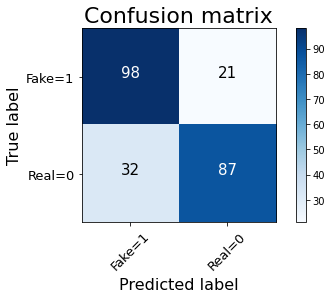

Confusion Matrix
[[98 21]
 [32 87]]
              precision    recall  f1-score   support

        Fake     0.8235    0.7538    0.7871       130
        True     0.7311    0.8056    0.7665       108

    accuracy                         0.7773       238
   macro avg     0.7773    0.7797    0.7768       238
weighted avg     0.7816    0.7773    0.7778       238
 0.7773109243697479
LR, N-Gram Vectors:  None


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


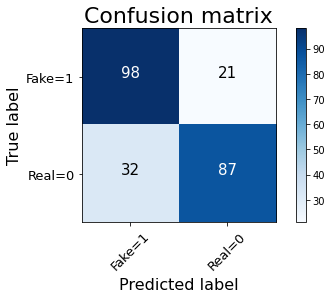

Confusion Matrix
[[98 21]
 [32 87]]
              precision    recall  f1-score   support

        Fake     0.8235    0.7538    0.7871       130
        True     0.7311    0.8056    0.7665       108

    accuracy                         0.7773       238
   macro avg     0.7773    0.7797    0.7768       238
weighted avg     0.7816    0.7773    0.7778       238
 0.7773109243697479
LR, CharLevel Vectors:  None


In [ ]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count_all_features, y_train, xvalid_count_all_features, y_val)
print ("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors   
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_all_features, y_train, xvalid_tfidf_all_features, y_val)
print ("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_all_features_ngrams, y_train, xvalid_tfidf_all_features_ngrams, y_val)
print ("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_all_features_chars, y_train, xvalid_tfidf_all_features_chars, y_val)
print ("LR, CharLevel Vectors: ", accuracy)

# *TEST SET*

## MOST ACCCURATE RESULTS ON THE TEST DATASET

***TEXT: Word Level TF-IDF Vectors***

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
def samples(classifier, feature_vector_train, label, feature_vector_valid, y_test,is_neural_net=False):
    # fit the training dataset on the classifier
    classifier_name = classifier
    classifier_name.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    acc = metrics.accuracy_score(y_test,predictions)    
    confusion = confusion_matrix(y_test,predictions)
    
    class_labels = classifier.classes_
    feature_names = tfidf_vect.get_feature_names()    #MOST IMPORTANT FEATURES FOR THE CLASSIFICATION TASK (IN GENERAL: FAKE AND TRUE NEWS)
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:50]  #Sorts coefficients according to their significance for the model
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-50:]

    for coef, feat in topn_class1:
        print('True', coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print('Fake', coef, feat)
        

    false_positives=[]

    false_negatives=[]


    for i,y_test_sample in enumerate(y_test):
        if y_test_sample==0 and predictions[i]==1 and len(false_positives)< 6:
            dataset_pos=X_val.iloc[i].name
            false_positives.append(data.loc[dataset_pos,'Text'])

            
        if y_test_sample==1 and predictions[i]==0 and len(false_negatives)< 28:
            dataset_pos=X_val.iloc[i].name
            false_negatives.append(data.loc[dataset_pos,'Text'])

    print('False Positive Examples')
    for ii in false_positives:
      print(ii) 
      print('\n')

    print('\nFalse Negative Examples')
    for ii in false_negatives:
      print(ii) 
      print('\n')

    
    return print(classification_report(predictions, y_test, target_names=['Fake', 'True'],digits=4),acc)

***LEXICAL FEATURES: word n-gram TF-IDF Vectors***

In [ ]:
# Linear Classifier on Ngram Level TF IDF Vectors ~ ALL LEXICAL FEATURES
accuracy = samples(linear_model.LogisticRegression(), xtrain_tfidf_word_ngram, y_train, xvalid_tfidf_word_ngram, y_val)
print ("LR, N-Gram Vectors: ", accuracy)

True -1.8849755247981999 miercoles
True -1.8661463019617888 jueves
True -1.489153220801612 martes
True -1.4222498953212637 domingo
True -1.3157520981736428 sabado
True -1.2434819892261535 año
True -1.230702138309527 funcion
True -1.165002330402798 numero
True -1.0807083138280973 lunes
True -1.0636982726607025 tres
True -1.0623784014481024 haber
True -1.0568303227636948 comunidad
True -1.0382101526975178 cinco
True -1.0381607850163335 coalicion
True -1.0213672400350744 barcelona
True -1.0153709200793182 detener
True -0.9925349606440154 autor
True -0.97673544317202 vox
True -0.9263795082669904 pp
True -0.9134032091599983 mayor
True -0.9078510639355998 ciento
True -0.8986997281479954 partido
True -0.8946992247932932 fiscalia
True -0.8933543794372101 britanico
True -0.888514250318694 centro
True -0.8679299480055834 sector
True -0.8628363207426228 candidato
True -0.8550738937250555 acusado
True -0.8517352377276284 dos
True -0.8474195007599297 junto
True -0.8275116720594213 coche
True -0.826

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
